In [11]:
#import des libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(180deg, #fff, rgb(160, 147, 147));
  position: static;
}
</style>

<h1>
# Structure de Révision pour les Mathématiques @ Jedha
</h1>

## 1. Algèbre

### 1.1. Équations et Inéquations
- Résolution d'équations linéaires
- Résolution d'équations quadratiques
- Systèmes d'équations
- Inéquations et systèmes d'inéquations

### 1.2. Fonctions
- Fonctions linéaires
- Fonctions quadratiques
- Fonctions exponentielles et logarithmiques
- Fonctions trigonométriques

### 1.3. Matrices
#### 1.3.1 Diagonalisation de matrice
0. À quoi ça sert ? 

La diagonalisation d’une matrice est un outil puissant en algèbre linéaire qui simplifie les calculs liés aux matrices et aux systèmes linéaires. 
Voici à quoi elle sert principalement :

1. Simplification des calculs de puissances de matrices
Quand une matrice est diagonalisée, elle peut être décomposée sous la forme $A = PDP^{-1} $, où D est une matrice diagonale et P est une matrice de passage. 

Cela simplifie considérablement le calcul des puissances de la matrice A, car : $A^n = P D^n P^{-1}$
Calculer $D^n$ est beaucoup plus simple, puisque D est diagonale et chaque élément diagonal est juste élevé à la puissance n.

2. Compréhension et analyse des systèmes dynamiques
    La diagonalisation aide à comprendre le comportement à long terme des systèmes dynamiques linéaires. 
    Par exemple, dans l’étude des systèmes différentielles ou des chaînes de Markov, connaître la diagonalisation permet de prévoir comment un système évolue au fil du temps.

3. Applications dans la résolution d’équations différentielles

    La diagonalisation est utile pour résoudre des systèmes d’équations différentielles linéaires. 
    En diagonalissant la matrice associée, on peut décomposer le système en équations plus simples à résoudre.

4. Transformation linéaire simplifiée

    Dans le contexte de la géométrie, diagonaliser une matrice permet de comprendre et de simplifier la transformation linéaire qu’elle représente, car la matrice diagonale indique directement les valeurs propres qui définissent l’étirement ou la compression dans les directions propres.

5. Décomposition spectrale

    La diagonalisation est liée à la décomposition spectrale, qui permet de décomposer une matrice en une somme de matrices pondérées par leurs valeurs propres. 
    Cela a des applications dans la mécanique quantique, la vibration des structures, l’analyse des graphes, et la compression de données (comme l’analyse en composantes principales).
    
##### Etapes pour diagonaliser une matrice :

0. Pour toute matrice A
1. Calcul des valeurs propres (eighenValues)
2. Calcul des vecteurs propres (eighenVectors ou matrice P), c'est la construction de la matrice de passage P tel que → Chaque colonne de P est un vecteur propre de A 
3. Verifier l'independance lineaire des vecteurs propres, revient à verifier que la matrice P formé par ces vecteurs est inversible. La mtrice est inversible si son detertmiannt est non nul (det_P ≠ 0) 
4. Construction de la matrice diagonale D tel que → La matrice D a pour valeur diagonle les valeurs propres de A placées dans le meme ordre que les vecteurs propres de P
5. Calcul de l'inverse de P → $P^{-1}$
6. Verifier l'equation  $A = PDP^{-1}$

In [12]:
matrix = np.array([[2, 1, 1], 
                   [1, 3, 1], 
                   [1, 1, 4]])

identityMatrix = np.identity(3) # Matrice identité 3x3

print("_______Diagonalisation d'une matrice 3x3______________")
print("0 : Matrice : ")
print(matrix)
print("______________________________________________________")
# 1 Calcul des valeurs propres
print("1 : Valeurs propres : ")
eigenValues = np.linalg.eigvals(matrix)
print(eigenValues)
print("______________________________________________________")
# 2 Calcul des vecteurs propres
print("2 : Vecteurs propres : ")
eigenVectors = np.linalg.eig(matrix)[1]
print(eigenVectors)
print("______________________________________________________")

#3 verification de l'independance des vecteurs propres
print("3 : Verification de l'independance des vecteurs propres : ")

# on calcule le determinant de la matrice vecteurs propres
det_P = np.linalg.det(eigenVectors)

if det_P != 0:
    print("Les vecteurs propres sont independants")
else:
    print("Les vecteurs propres ne sont pas independants, la matrice n'est pas diagonalisable")
    pass 

print("______________________________________________________")
print("4 : Construction de la matrice de passage P : ")
# on cherche la matrice inverse de la matrice des vecteurs propres
inverse = np.linalg.inv(eigenVectors)
print(inverse)
print("______________________________________________________")
print("5 : Construction de la matrice diagonale : ")
# on construit la matrice diagonale
diagonal = np.diag(eigenValues)
print(diagonal)

print("______________________________________________________")
# on calcule l'inverse de la matrice des vecteurs propres
print ("6 : Inverse de la matrice des vecteurs propres : ")
inverse = np.linalg.inv(eigenVectors)
print(inverse)
print("______________________________________________________")

print("7 : Verification de la diagonalisation de la matrice : ")
# on verifie que la matrice est bien diagonalisable
result = eigenVectors @ diagonal @ inverse
print(result)
print("______________________________________________________")


_______Diagonalisation d'une matrice 3x3______________
0 : Matrice : 
[[2 1 1]
 [1 3 1]
 [1 1 4]]
______________________________________________________
1 : Valeurs propres : 
[5.21431974 1.32486913 2.46081113]
______________________________________________________
2 : Vecteurs propres : 
[[ 0.39711255  0.88765034 -0.23319198]
 [ 0.52065737 -0.42713229 -0.73923874]
 [ 0.75578934 -0.17214786  0.63178128]]
______________________________________________________
3 : Verification de l'independance des vecteurs propres : 
Les vecteurs propres sont independants
______________________________________________________
4 : Construction de la matrice de passage P : 
[[ 0.39711255  0.52065737  0.75578934]
 [ 0.88765034 -0.42713229 -0.17214786]
 [-0.23319198 -0.73923874  0.63178128]]
______________________________________________________
5 : Construction de la matrice diagonale : 
[[5.21431974 0.         0.        ]
 [0.         1.32486913 0.        ]
 [0.         0.         2.46081113]]
___________

In [13]:
# Verifications avec les fonctions python
print("Diagonale avec function python : ")
diagonal = np.diag(matrix)
print(diagonal)
print("______________________________________________________")


Diagonale avec function python : 
[2 3 4]
______________________________________________________


Les deux matrices sont elles égales ?

In [14]:
print("Les deux matrices sont elles égales ? ")
print("diagonale calculée : ")
print(result)
print("diagonale Python")
print(diagonal)



Les deux matrices sont elles égales ? 
diagonale calculée : 
[[2. 1. 1.]
 [1. 3. 1.]
 [1. 1. 4.]]
diagonale Python
[2 3 4]


## 2. Géométrie
### 2.1. Géométrie Plane
- Propriétés des triangles
- Propriétés des quadrilatères
- Cercles et angles

### 2.2. Géométrie dans l'Espace
- Solides et volumes
- Coordonnées dans l'espace
- Vecteurs et produits scalaires

## 3. Analyse
### 3.1. Dérivées
- Définition
- Règles de dérivation
- Applications des dérivées

### 3.2. Intégrales
- Définition et interprétation
- Techniques d'intégration
- Applications des intégrales

## 4. Probabilités et Statistiques

### 4.0. Collections, echantillonages et Types de données :


Les collections sont utilisées pour connaitre les moyens de collecter les données, ils sont aujourd'hui de quatre types

|  Collection  |      Explanation      |  Example |
|----------|:-------------|------|
| Observational |  Les données observationnelles sont liées à l'etude que l'ont veux mener | Arbres devellopant une maldie dans une forets  |
| Experimental |   Les données experimentales sont la suite logique des observations.  Une fois l'observation établie, un comptage peut-être pratiqué, c'est ce que l'on appelle donné expérimentale.  |   Nombre d'arbres infectés |
| Transversal | Les Études transversales sont des données qui sont liées au temps. Elles sont écrites et non changeables comme par exemple les données historiques. |  Frise chronologique avec Évènements |
| Longitudinal | Les Études longitudinales s'effectuent le long terme et continue de mesurer par les expérimentations, le groupe prealablement étudié. |    Suivi du registre patient |


L'echantillonage est le moyen, au sein de notre precedente collection de venir choisir une "fenetre" representative de l'ensemble. L'echantillonage est utilisée pour reduire la quantité de données à traiter.
C'est egalement un moyen d'extrapolation qui peut etre utlisée dans le cas de sondage qui, par definition, ne peut pas rendre compte de l'entiereté de la population.
L'utilisation de l'echantillonage induit une erreur, c'est cette erreur qui doit etre quantifiée !

![image](./resources/probability-sampling.png)


|  Sampling  |      Explanation      |  Example |
|----------|:-------------|------|
| Simple Random | This sampling is the simple way to get an unbiased dataset, it uses a random algorithm depending on the robustess of this algorithm|  /  |
| Stratified   |  The stratified sampling  | $1600 |
| Cluster | The cluster rendering is  |    $1 |
| Convenience  |    centered   |   $12 |


De manière à 


|  Data Type  |      Explanation      |  Example |
|----------|:-------------|------|
| Quantitative (Quantitatif)  |  <ul><li>These datas can be countable it's anything that can be counted.<br> Ces données sont dénombrables et peuvent être comptées.</li><li>They can be Discrete or continue, depending on the nature of datas</li>| age, weight or bolt |
| Qualitative  |    They are not countable, these datas can defined or characterize an item/object by a specificity. These datas can be Ordinal or nominal.<br>(  Non dénombrables, ces données peuvent définir ou caractériser un élément/objet par une spécificité. Ces données peuvent être ordinales ou nominales.)   |  gender, color, state of a machine  |
| Ordinal | An ordinal data is ordered by size. We are able to ordered and compared them. |  In a survey, the responses can be classified by good or wrong response   |
| Nominal | Opposite, nominal data can not be ordered | It's impossible to say if Blue is higher than red |
| Discrete | Discrete Datas are without continuity between two value | Number of person, we can count 1 or 2 person, not one and half |
| Continuous | Continuois value can be an infinite of solution. There is no one gap in the series of datas |  A Temperature measurement, temperature growth regularly without jump from a value to an another one  |




### 4.1. Probabilités
- Concepts de base
Les probabilités sont un domaine des mathématiques qui permet de quantifier la chance qu’un événement se produise.
Voici comment se decline les concepts de base des probabilités :

1. Caractere aléatoire
    C’est une action dont le résultat est incertain, comme lancer un dé ou tirer une carte.

2. Événement
    Un événement est un résultat ou un ensemble de résultats d’une expérience. 
   Par exemple, obtenir un « 6 » lors d’un lancer de dé.

3. Espace échantillon
    L’ensemble de tous les résultats possibles d’une expérience. 
   Par exemple, pour un lancer de dé, l’espace échantillon est \{1, 2, 3, 4, 5, 6\}.

4. Probabilité d’un événement
    C’est une valeur entre 0 et 1 qui représente la chance qu’un événement se produise. 
   La probabilité se calcule ainsi :
    $$
    P(A) = \frac{\text{n }}{\text{NP }}
    $$
   Avec     n = nombre de résultats favorables 
                NP = nombre total de résultats possibles.

5. Événements complémentaires
    Si A est un événement, son complémentaire $A{\prime}$  est l’événement où A  ne se produit pas. 
    Sa probabilité est $P(A{\prime}) = 1 - P(A)$.

6. Union et intersection
	•	Union ( $A \cup B$ ) : Probabilité que A ou B (ou les deux) se produisent.
	•	Intersection ( $A \cap B$ ) : Probabilité que A et B se produisent en même temps. 
	Si  A  et  B  sont indépendants,  $P(A \cap B) = P(A) \cdot P(B) $.

7. Indépendance
    Deux événements A et B sont indépendants si la réalisation de l’un n’affecte pas la probabilité de l’autre.

8. Probabilité conditionnelle
    C’est la probabilité qu’un événement A se produise sachant que B s’est déjà produit, notée P(A|B) et calculée par :

    $$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

> **Ces concepts permettent de modéliser et de comprendre des situations incertaines et sont à la base des calculs en probabilités.**

- Lois de probabilité



- Variables aléatoires

### 4.2. Statistiques descriptive
#### 4.2.1 Analyse des données
Parcourir nos datasets est essentiel pour comprendre comment s'articule les données. C'est le moment ou nous allons entrevoir les connections qu'il existe entre les differentes variables de nos tables. De cette analyse nous allons egalement estimé la pertienence du remplissage des données; sont-elles suffisantes, y'a t'il des champs vides, les types de données sont-ils bien respectés... 

Pour cela nous allons procedé à une analyse statistique pour nous aider à meieux comprendre le jeu de données 

- Etapes clefs de lanalyse des données
    1. Calcul de l'intervalle de confiance
    2. Calcul des mesures de tendance centrale (moyenne, médiane, mode)
    3. Calcul des mesures de dispersion (variance, écart-type, étendue)
    4. Analyse des distributions (histogrammes, courbes de densité)
    5. Tests statistiques (tests d'hypothèses, tests de normalité)
    6. Analyse de corrélation (coefficients de corrélation, matrices de corrélation)


#### 4.2.2. Intervalle de confiance

L'intervalle de confiance permet de connaitre l'erreur que nous faisons en choisissant l'echantillon sur lequel nous travaillons et reponds à la question :
Est-ce que notre echantillon est suffisament representatif de la population totale.

1. Calculer la moyenne 
2. Calculer l'ecart type
3. Determiner le niveau de confiance α
4. Obtenir le Z-Score
4. Calculer la marge d'erreur
5. Etablir l'intervalle de confiance
6. Interpréter les resultats
7. Calculer le Z score


#### 4.2.3. Mesures de tendance centrale

#### 4.2.4.  Mesures de dispersion
1. Variance

2. Écart type : standard deviation

3. Étendue

#### 4.2.5. Analyse des distributions

- Notion de quartile


#### 4.2.6 Test d'hypothese

1. Processus de test d'hypothèse

$H_0$ et $H_1$

2. T-Test et Z-Test

3. P-Value

4. Interpréter les résultats d'un test d'hypothèse




______________________________________________________
1 . Calcul de la moyenne de la distance en metre______________
Moyenne :  7067.378095238095
En moyenne cet utilisateur court sur une distance de  7.067 kilomètres
______________________________________________________
2. Calcul de l'ecart type________________________
Ecart type calculé :  5757.784400584607
Ecart type pythonifié :  5757.7844005846055
Ecart entre Ò calculé et Ò pythonifié :  1.8189894035458565e-12
______________________________________________________
3. Determiner le niveau de confiance α (entre 0 et 1) de cette information, par defaut 95%
Niveau de confiance α :  0.95
______________________________________________________
calcul du Z score_____________________________________
En cours de dev :  -1.2272825107033565
_________________________________________
 Calculer la marge d'erreur______________
Marge d'erreur :  11285.257425145826
_________________________________________


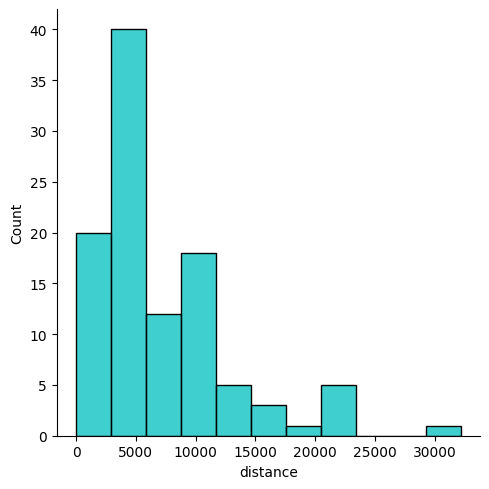

In [15]:
sample=pd.read_excel('../Datas/StravaRunningData.xlsx')

# on utilise ici un dataset qui provient d'un coureur strava
# notre objectif va etre d'estimer la performance d'une sortie de ce coureur en fonction de son historique de course.
# pour cela nous allons observer uniquement la distance parcourue. 
# On pourra (quand on sera pus fort), regarder la vitesse moyenne sur chacune des courses pour connaitre sa performance selon les distances 


#____________________________________________________________________________________
# 1 Calculer la moyenne
print("______________________________________________________")
print("1 . Calcul de la moyenne de la distance en metre______________")
mean = np.mean(sample["distance"])
n = len(sample)
print("Moyenne : ", mean)
print('En moyenne cet utilisateur court sur une distance de ', round(mean)/1000, 'kilomètres')
print("______________________________________________________")
#____________________________________________________________________________________
# 2 Calculer l'ecart type
print("2. Calcul de l'ecart type________________________")
 
# on calcul le carré des ecarts à la moyenne
squareDeviation  = [pow((mean-val),2) for val in sample["distance"]]
# on fait la somme de ces ecarts
sumDeviation = sum(squareDeviation)
sumDeviationAvg = sumDeviation / n
standardDeviation = pow(sumDeviationAvg,0.5)
print(  "Ecart type calculé : ", standardDeviation)

std = np.std(sample["distance"])
print("Ecart type pythonifié : ", std)

ecartSTD = abs(standardDeviation - std)
print("Ecart entre Ò calculé et Ò pythonifié : ", ecartSTD)

# on gardera le resuylat python pour la suite des calculs soit std

#____________________________________________________________________________________
# 3 Determiner le niveau de confiance α
print("______________________________________________________")
print("3. Determiner le niveau de confiance α (entre 0 et 1) de cette information, par defaut 95%")
confidence_level = 0.95
print("Niveau de confiance α : ", confidence_level)

#____________________________________________________________________________________
# 4 Obtenir le Z-Score
print("______________________________________________________")
print("calcul du Z score_____________________________________")

def zscoreCalc(val):
    return (val - mean) / std

print("En cours de dev : ",zscoreCalc(confidence_level))

zScore=[zscoreCalc(val) for val in sample["distance"]]

#Il faut trouver 1,96 ici pour un niveau de confiance à 95%

zScore = 1.96


print("_________________________________________")
print(" Calculer la marge d'erreur______________")
errorMargin = zScore * (std / pow(n,0,5))
print("Marge d'erreur : ", errorMargin)
print("_________________________________________")

#ci  = meanSample +- (z * (stdSample / sqrt(n)))

sns.displot(sample["distance"], color='c', edgecolor='black')
#plt.hist(sample["distance"], bins=100, color='c', edgecolor='black')




- Exemple de calcul de l'intervalle de confiance
  - Soit un echantillon S de taille n = 100
    -  /{x_1, x_2, ..., x_n}/
    - La moyenne de l'echanillon est de $\bar{m}$ = 18 
    - Ecart type = 3
    - Intervalle de confiance = 95%
    - Calcul de l'interval de confiance
    - $IC = \bar{x} \pm Z \cdot \frac{\sigma}{\sqrt{n}}$
    - $IC = 100 \pm 1.96 \cdot \frac{10}{\sqrt{100}}$
    - $IC = 100 \pm 1.96 \cdot 1$
    - $IC = 100 \pm 1.96$
    - $IC = [98.04, 101.96]$
    - L'intervalle de confiance est donc [98.04, 101.96]
    - Cela signifie que la moyenne de la population totale est comprise entre 98.04 et 101.96 avec un niveau de confiance de 95%
    - Si on avait pris un niveau de confiance de 99%, on aurait eu un intervalle de confiance plus large
    -  $IC = 100 \pm 2.58 \cdot 1$
    -  $IC = 100 \pm 2.58$
    -  $IC = [97.42, 102.58]$
    - L'intervalle de confiance est donc [97.42, 102.58]
    -  Cela signifie que la moyenne de la population totale est comprise entre 97.42 et 102.58 avec un niveau de confiance de 99%
    - Plus le niveau de confiance est élevé, plus l'intervalle de confiance est large
    -  Plus l'intervalle de confiance est large, plus on est sûr que la moyenne de la population totale est comprise
    -  dans cet intervalle
    - Plus l'intervalle de confiance est large, moins on est sûr de la précision de notre estimation
    -  Plus l'intervalle de confiance est large, plus on a besoin d'un échantillon important pour le calculer
                                                                                                                                                            
    
#### 4.2.3. Mesures de tendance centrale



#### 4.2.4.  Mesures de dispersion
1. Variance

2. Ecart type : standard deviation

3. Etendue

#### 4.2.5. Analyse des distributions

- Notion de quartil
- A/B test





## 5. Logique et Raisonnement
- Logique propositionnelle
- Raisonnement déductif et inductif
- Preuves mathématiques

## 6. Ressources Supplémentaires
- Livres recommandés
- Sites web et vidéos éducatives
- Applications et outils en ligne
- Sources de données :

- http://data.worldbank.org/ # World Bank
- https://github.com/fivethirtyeight/data # FiveThirtyEight
- https://github.com/BuzzFeedNews # Buzzfeed
- https://opendata.socrata.com/ # Open data 
- https://registry.opendata.aws/ # Amazon Web Services
- https://cloud.google.com/bigquery/public-data/ # Google Big Query
- https://en.wikipedia.org/wiki/Wikipedia:Database_download # Wikipedia
- https://www.kaggle.com/datasets # Kaggle datasets 
- https://archive.ics.uci.edu/datasets # Machine learning
- https://www.dataquest.io/blog/free-datasets-for-projects/ # Free datasets for projects 
- https://data.nasdaq.com/ # Finance
- https://data.world/ # Datasets from the community 
- https://www.reddit.com/r/datasets/top/?sort=top&t=all # Reddit
- http://academictorrents.com/browse.php # Torrents
- https://dev.twitter.com/streaming/overview # Twitter
- https://www.quandl.com/ # Finance 
- https://www.quantopian.com/ # Finance 
- https://www.wunderground.com/weather/api/ # Weather data

** Institutionnels **

- https://www.data.gouv.fr/fr/ # France
- https://www.data.gov/ # USA
- https://www.data.gov.uk/ # UK
- https://www.data.qld.gov.au/ # Queensland
- https://www.data.vic.gov.au/ # Victoria
- https://www.data.sa.gov.au/ # South Australia
- https://www.data.nsw.gov.au/ # New South Wales
- https://www.data.wa.gov.au/ # Western Australia
- https://www.data.act.gov.au/ # Australian Capital Territory
- https://www.data.nt.gov.au/ # Northern Territory
- https://www.data.tas.gov.au/ # Tasmania
- https://www.data.govt.nz/ # New Zealand
- https://www.data.gov.sg/ # Singapore
- https://www.data.gov.hk/ # Hong Kong    
- https://www.data.gov.tw/ # Taiwan
- https://www.data.go.kr/ # South Korea
- https://www.data.go.jp/ # Japan
- https://www.data.gov.my/ # Malaysia
- https://www.data.gov.ph/ # Philippines
- https://www.data.gov.vn/ # Vietnam
- https://www.data.gov.in/ # India
- https://www.data.gov.pk/ # Pakistan
- https://www.data.gov.bd/ # Bangladesh